# Using Machine Learning Tools 2021, Assignment 2

## Breast Cancer Classification

## Overview
In this assignment, you will apply two classifier types, Decision Trees and Support Vector Machines, to the problem of classifying breast cancer from a set of characteristics of the cell nuclei in an image of a fine needle aspirate of a breast mass. The Wisconsin Breast Cancer data set is available from the collection of example data sets in scikit learn.

The main aims of the assignment are:

- To use and compare two different classifier approaches on the same data set;
- To evaluate the classifiers and their structure in a white box fashion;
- To practice using pipelines and hyper parameter optimisation;
- To explore a multi-dimensional feature space and handle multi-dimensional data.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis. 
- Your code must use the current stable versions of python libraries, not outdated versions! 
- All data processing must be done within the notebook after calling the load function.
- Comment your code, so that its purpose is clear to the reader!
- **Before submitting your notebook, make sure to reset the kernel and run all cells in your final notebook so that it works correctly!**
- In the submission file name, do not use spaces or special characters.

This assignment is divided into several tasks. Use this notebook and enter your code, results and answer text analysis under the exact number that it belongs to!

Make sure to answer every question with **separate answer text (“Answer: …”) in a Markdown cell** and check that you answered all sub-questions/aspects within the question. The text answers are worth points!

Make the **figures self-explanatory and unambiguous.** Always include axis labels, if available with units, unique colours and markers for each curve/type of data, a legend and a title. Give every figure a number (e.g. at start of title), so that it can be referred to from different parts of the text/notebook. This is also worth points!

The assignment is self-sufficient. If you need to "evaluate" or "compare", then **use the diagrams and metrics generated in the preceding tasks** of the assignment, not new ones. That is why there are specific instructions for those diagrams.


## 1. Investigate the dataset (25%)

### 1.1 Load the Wisconsin breast cancer data set 
Do this from the scikit-learn sample data collection. Read the documentation:   
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
and https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset. 

Figure 1 below shows an example image of a tissue sample obtained by fine needle aspiration. A more detailed description of the parameters can be found in the paper by Street et al: 
https://minds.wisconsin.edu/bitstream/1793/59692/1/TR1131.pdf

<center><img src="\FineNeedleAspiration.jpg" width="300" alt="Image of a collection of cells"></center>

Figure 1. Example of a fine needle aspiration tissue image showing cells and cell nuclei (dark) (Shigematsu et al. 2011, [Creative Commons 2.0 License)](http://creativecommons.org/licenses/by/2.0)

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
breast_cancer = load_breast_cancer(as_frame=True)            # load the dataset as a DataFrame
bcdf = breast_cancer.frame                                   # bcdf includes both data and target
bcdf.iloc[:,30].replace({0:1,1:0},inplace=True)              # replace the labels of malignant cases and benign cases. 
X = bcdf.iloc[:,0:30]                                        # use X to refer to data, y for target
y = bcdf.iloc[:,30]
bcdf.describe()                                              # check if there is any unreasonable value in the dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [3]:
np.sum(bcdf.isna())            # check if there is any NaN in the dataset

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### 1.2 Question
Read the description of each of the 10 parameters (or features) in section 3 of the paper by Street et al. (link above) but do not worry about all the details – just aim to get some intuitive grasp of what each parameter is aiming to capture. Note that the "snakes" referred to are a type of algorithm used to extract the cell boundaries (with "snake points" being points on the boundary) and you do not need to know the details of how snakes work to proceed. **Which of the 10 parameters (features) are primarily based on the geometry (or shape) of the cell and which ones are primarily based on the intensities inside or nearby the cell?**

### 1.2 Answer:  
According to the instructions, 'radius', 'perimeter', 'area', 'smoothness', 'concavity', 'concave points', 'symmetry', 'fractal dimension' attributes are primarily based on the shape of the cells, 'compactness' and 'texture' attributes are based on the intensities inside or nearby the cell.
***

### 1.3 Histograms
For each of the 10 features the mean, standard error and maximum (or "worst") values are calculated across the image, which gives 30 parameters in total from each image (and there were 569 images processed). **Plot histograms** for each feature but separate the malignant cases (these are the cancerous ones, with target label=0) from the benign cases (these are non-cancerous, with target label=1), so that two distributions can be seen in each plot. This can be done with the `matplotlib` function `hist()`, using appropriate arguments, but it is easier if you use the `seaborn` function `distplot()`. Group your 30 plots so that they are clearly in three groups (one for mean values, one for standard error values, and one for "worst" values) and then have the 10 plots in each group arranged in 5 rows with 2 columns, and the three groups either horizontally or vertically aligned.  See a small, basic illustration of what it should look like below, with horizontal group alignment – when doing your own feel free to improve on this basic version.

<center><img src="Example_Hist_Plots.jpg" width="700" alt="Example plots of histograms"></center>

Text(-1.6, 250, 'Mean Values')

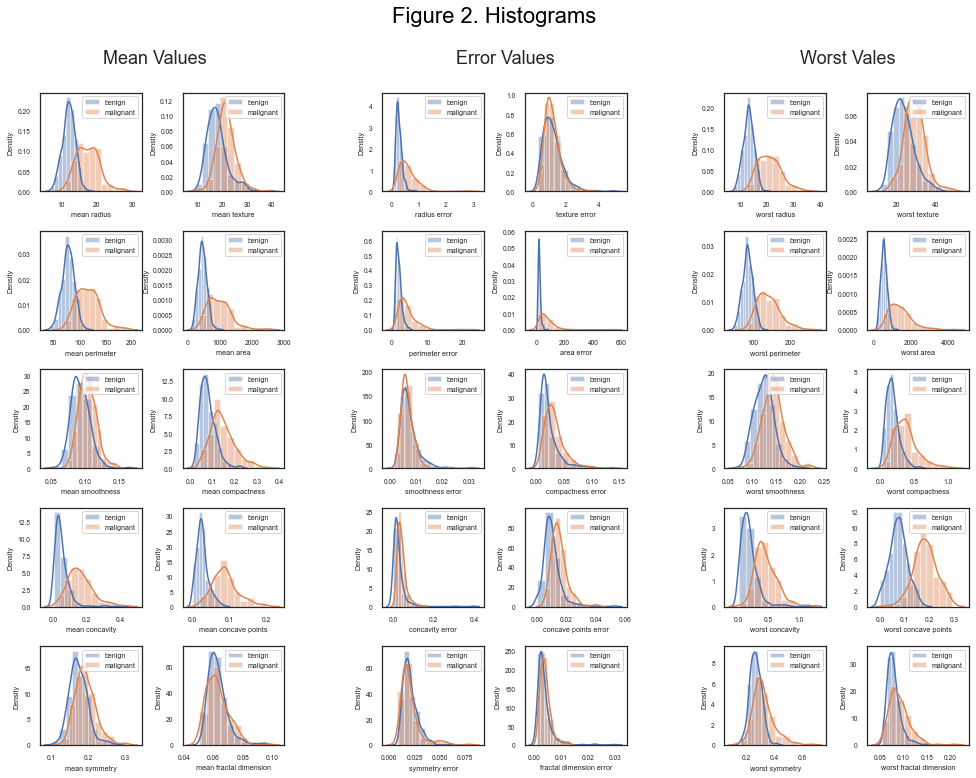

In [4]:
bcdf_col_lst = list(bcdf.columns)                   # create a list of attribute names
lst_mean = bcdf_col_lst[0:10]                       # the first 10 are mean values, middle 10 are error values, last 10 are worst values
lst_error = bcdf_col_lst[10:20]
lst_worst = bcdf_col_lst[20:30]

fig = plt.figure(figsize=(12,12))                   # set the figure
plt.subplots_adjust(left=None,bottom=None,right=1.2,top=None,wspace=0.4,hspace=0.4)
plt.suptitle('Figure 2. Histograms',fontsize=22,x=0.65,y=0.98)
sns.set(font_scale=0.6,style='white')

sub = fig.add_gridspec(1,3)                         # add three subgridspec
sub0 = sub[0].subgridspec(5,2)
sub1 = sub[1].subgridspec(5,2)
sub2 = sub[2].subgridspec(5,2)

k = 0
for i in range(5):                                  # plot the three sets of figures
    for j in range(2):
        fig.add_subplot(sub0[i,j])                  # 0 is benign, 1 is malignant now
        sns.distplot(bcdf[bcdf['target']==0][lst_mean[k]],bins=10,label='benign')            # plot the kth attribute in mean values
        sns.distplot(bcdf[bcdf['target']==1][lst_mean[k]],bins=10,label='malignant')
        plt.legend(loc='upper right',fontsize=7)
        fig.add_subplot(sub1[i,j])
        sns.distplot(bcdf[bcdf['target']==0][lst_error[k]],bins=10,label='benign')           # plot the kth attribute in error values
        sns.distplot(bcdf[bcdf['target']==1][lst_error[k]],bins=10,label='malignant')
        plt.legend(loc='upper right',fontsize=7)
        fig.add_subplot(sub2[i,j])
        sns.distplot(bcdf[bcdf['target']==0][lst_worst[k]],bins=10,label='benign')           # plot the kth attribute in worst values
        sns.distplot(bcdf[bcdf['target']==1][lst_worst[k]],bins=10,label='malignant')
        plt.legend(loc='upper right',fontsize=7)
        k = k + 1
        
plt.text(-0.12,250,'Worst Vales',fontsize=18)
plt.text(-0.85,250,'Error Values',fontsize=18)
plt.text(-1.6,250,'Mean Values',fontsize=18)

### 1.4 ROC curves
It is possible to **plot receiver-operating-characteristic (ROC) curves** for single features. Do this by considering a very simple classifier – that is one where the feature is thresholded and everything below the threshold is predicted to be one class and everything above the threshold is predicted to be the other class. By varying the threshold you can get a set of performance values and plot these as an ROC curve. It is possible to do this through sklearn calls, but in this instance it is probably easier to write a function that can return the True Positive Rate (TPR) and False Positive Rate (FPR) for a given threshold and feature. Remember that a "positive" should relate to application, so in this case an instance of cancerous cells, and not be determined by the arbitrary numbers chosen for the labelling. Then, call this function repeatedly with different thresholds (you must choose the appropriate range of thresholds) and these values can be plotted as the ROC curve, with TPR vs FPR. Create three plots (one for each group: mean; standard error; worst) and in each plot include 10 curves, one for each feature of that group, showing each curve with a different colour/line-style/marker and including an appropriate legend to identify which curve corresponds to which feature. See a small, basic illustration of what it should look like below for one group – when doing your own you can improve on this basic version.

<center><img src="example_roc.jpg" width="500" alt="Example ROC plot for one group"></center>

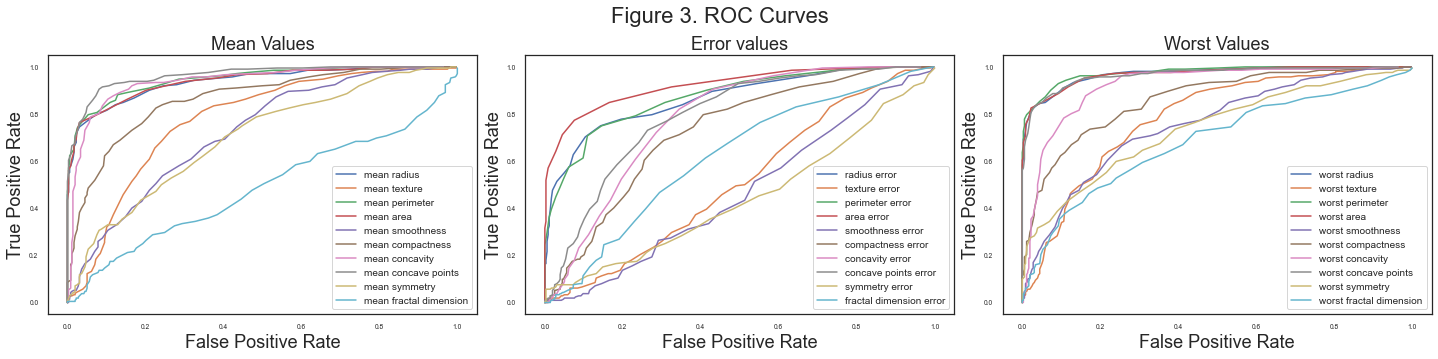

In [5]:
N = bcdf[bcdf['target']==0].count()[0]                            # total number of benign cases
P = bcdf[bcdf['target']==1].count()[0]                            # total number of malignant cases
def ROC(th,feat):    
    FP = bcdf[(bcdf['target']==0)&(bcdf[feat]>th)].count()[0]     # if the case is benign but classified as malignant, it is a FP case
    TP = bcdf[(bcdf['target']==1)&(bcdf[feat]>th)].count()[0]     # if the case is malignant and classified as malignant, it is a TP case
    FPR = FP/N                                                    # calculate the FPR and TPR
    TPR = TP/P
    return FPR,TPR

lst_cat = [lst_mean,lst_error,lst_worst]                          # lst_cat is a list of three lists
lst_cat_names = ['Mean Values','Error values','Worst Values']
fig = plt.figure(figsize=(20,5))                                  # set the figure
plt.suptitle('Figure 3. ROC Curves',fontsize=22)
for k in range(3):
    fig.add_subplot(1,3,k+1)                                      # add subplots
    for i in lst_cat[k]:                                          # i.e. [lst_mean,lst_error,lst_worst]. i will be one of the features
        FPR_lst = []                                              # create two empty lists
        TPR_lst = []
        a = np.linspace(bcdf[i].min(),bcdf[i].max(),num=100,endpoint=True)    # 100 times iteration for each attribute
        for j in a:
            FPR,TPR = ROC(j,i)                                    # FPR,TPR take the values returned by the ROC function
            FPR_lst.append(FPR)                                   # append elements to the empty list before
            TPR_lst.append(TPR)
        ROC_df = pd.DataFrame({'FPR':FPR_lst,'TPR':TPR_lst})
        plt.plot(ROC_df['FPR'],ROC_df['TPR'],label=i)             # plot the figures
    plt.legend(fontsize=10)                                       # set the figures
    plt.title(lst_cat_names[k],fontsize=18)
    plt.xlabel('False Positive Rate',fontsize=18)
    plt.ylabel('True Positive Rate',fontsize=18)
plt.tight_layout()

### 1.5 Questions
1. **Which of the features seems promising based on the histograms and ROC curves?**
2. **Justify your choice** while referring to the particular aspects of the relevant plots that show a good ability to discriminate between the classes. 
3. **Choose your top five candidate features.**

### 1.5 Answer:
1. 'worst perimeter', 'worst concave points', 'worst area', 'worst radius' seems promising based on the histograms and ROC curves.   
2. In ROC curves 'worst values' subplot, the ROC curves of the four attributes above are similar in shape and all approximate right angles, and AUC of them are also larger than the other attributes. These characteristics indicate a better performance in classifying. In histograms, the differences between malignant and benign in these four attributes are also significant. Most values of malignant cases are higher than that of benign cases. Overlap parts in these four features are relatively small compared to the others, so intuitively it will also be easier for the algorithms to classify the cases.   
3. Some attributes in 'mean values' also show the same characteristics as the attributes in 'worst values' and have good potential for classification tasks. 'mean concave points' attribute is the best one of them. I would choose 'mean concave points' as the fifth candidate feature, so my top five candidate features are 'worst perimeter', 'worst concave points', 'worst area', 'worst radius' and 'mean concave points'.
***

### 1.6 Analysis Point
For each of the 30 features, calculate the mean of all instances of the malignant class and, separately, the mean of all instances of the benign class. Assemble these into two vectors, each of length 30. Now calculate the average of the two vectors (to get one vector of length 30) and print the values. This is the “Analysis Point”, which represents the mean location in the 30-dimensional space of all of the features, and is a point that should be approximately midway between both classes. Save this vector of values as you will use it later on.

In [6]:
mean_ben_mal = bcdf.groupby('target').mean()              # group by the 'target' column and calculate the mean values for each group
mean_benign = mean_ben_mal.iloc[0,:]                      # choose the first row and assign the values to mean_benign variable
mean_malignant = mean_ben_mal.iloc[1,:]                   # choose the second row and assign the values to mean_malignant variable

analysis_point = (mean_benign + mean_malignant)/2         # analysis point equals to the mean of mean_benign and mean_malignant
analysis_point = np.array(analysis_point)                 # convert analysis_point to an array for later use
analysis_point

array([1.48046770e+01, 1.97598338e+01, 9.67203918e+01, 7.20583306e+02,
       9.76880688e-02, 1.12636202e-01, 1.03416169e-01, 5.68537031e-02,
       1.83547478e-01, 6.27737446e-02, 4.46582450e-01, 1.21564737e+00,
       3.16212527e+00, 4.69037771e+01, 6.98799815e-03, 2.68597058e-02,
       3.39103725e-02, 1.24590622e-02, 2.05281038e-02, 3.84922846e-03,
       1.72573062e+01, 2.64166388e+01, 1.14188134e+02, 9.90592880e+02,
       1.34902366e-01, 2.78748326e-01, 3.08421644e-01, 1.28340828e-01,
       2.96856931e-01, 8.54860128e-02])

### 1.7 Test dataset

Split the dataset into three sets, one training and two test datasets, according to an 80/10/10 split respectively, keeping the proportion of the two classes similar in all. You will use one test dataset for evaluating performance and one test dataset for comparing classifiers.

**Question: Why is it necessary to have a second test dataset in this case?**

In [7]:
# split the dataset (stratified sampling) into a training set and a test set
split = StratifiedShuffleSplit(n_splits=1,train_size=0.8,test_size=0.2,random_state=2) 
for train_index,test_index in split.split(X,y):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index].reset_index(drop=True)
    y_test = y.loc[test_index].reset_index(drop=True)
    
# split the test set (stratified sampling) into test_1 and test_2
split_2 = StratifiedShuffleSplit(n_splits=1,train_size=0.5,test_size=0.5,random_state=2)
for test_index_1,test_index_2 in split_2.split(X_test,y_test):
    X_test_1 = X_test.loc[test_index_1]
    y_test_1 = y_test.loc[test_index_1]
    X_test_2 = X_test.loc[test_index_2]
    y_test_2 = y_test.loc[test_index_2]
print('Number of benign/malignant cases in training set are:\n',np.sum(y_train==0),np.sum(y_train==1))
print('Number of benign/malignant cases in test set 1 are:\n',np.sum(y_test_1==0),np.sum(y_test_1==1))
print('Number of benign/malignant cases in test set 2 are:\n',np.sum(y_test_2==0),np.sum(y_test_2==1))

Number of benign/malignant cases in training set are:
 285 170
Number of benign/malignant cases in test set 1 are:
 36 21
Number of benign/malignant cases in test set 2 are:
 36 21


### 1.7 Answer:
Because if I use the same test set for evaluating the model and comparing with the other model, the result will be unconvincing. Test set 1 is like the validation set in this case. If I first fine tune the model based on the result of the test set 1 and then I use it to compare with the result of the other model, it is unfair to the other model. Only when using the dataset that has not been used in the process of training and tuning to compare will the result be convincing.
***

## 2 Train a decision tree classifier (20%)

### 2.1 Create a decision tree classifier object
Use the gini criterion and random_state=0. Below, you will perform a hyper parameter search of max_depth and min_samples_split. Read about the remaining parameters of the classifier in the documentation (i.e., min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split and class_weight) and decide whether the default value is a good choice in this application. 

**Question: Are there any parameters where using a setting that is different from the default setting would be better for this application?** 

The documentation can be found here:  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 

Note that you should always read the description of each parameter and think of whether the default value is good or another value should be chosen. Use it like a checklist!

In [8]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree_clf = DecisionTreeClassifier(criterion='gini',random_state=0,class_weight='balanced')   

### 2.1 Answer:
This dataset has 30 attributes and 569 samples; it is a small dataset with two classes. When training a decision tree classifier for this dataset, it would be better to use 'max_depth' and 'min_samples_split' parameters to control the depth of the tree, which is helpful for accelerating the training process and avoiding overfitting on some level. Another useful parameter for this dataset is 'class_weight', because in 455 samples of the training set, benign cases are 100 more than malignant cases. Setting class_weight as 'balanced' is really helpful for balancing the tree and improving the classifier performance. We can see that after setting the class_weight as 'balanced', the depth of the tree reduced and the recall score had become higher than before.
***

### 2.2 Build a pipeline
This should include any pre-processing steps that you think are necessary. **Question: Is scaling of the data necessary for using a decision tree classifier? Please explain the reasons for your answer.**

In [9]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import MinMaxScaler
#tree_clf_pipeline = Pipeline([('scaler',MinMaxScaler())])
#X_train_tree = pd.DataFrame(tree_clf_pipeline.fit_transform(X_train,y_train),columns=X.columns)    # fit and transform X_train
#X_test_1_tree = pd.DataFrame(tree_clf_pipeline.transform(X_test_1),columns=X.columns)              # transform two test sets
#X_test_2_tree = pd.DataFrame(tree_clf_pipeline.transform(X_test_2),columns=X.columns)
#analysis_point_tree = tree_clf_pipeline.transform(analysis_point.reshape(1,-1)).ravel()            # transform the analysis point

### 2.2 Answer:
No, scaling of the data is not necessary for using a decision tree classifier. Decision tree classifiers classify the samples based on simple conditions and rules such as 'is that value larger than the threshold?' instead of measuring the distances between samples, so scaling the dataset is redundant for a decision tree classifier. I tried to build a pipeline and scale the data before training the decision tree classifier, but the result was worse than using the original dataset, so I commented the pipeline out from the code.
***

### 2.3 Perform a grid search
Use a five-fold cross validation over values of the maximum depth (max_depth) and the minimum number of samples for splitting (min_samples_split). Choose the value range yourself. **Question: What are the best values for max_depth and min_samples_split?**
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [10]:
from sklearn.model_selection import GridSearchCV
# search the best 'max_depth' and 'min_samples_split' parameter for the model
tree_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13],'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12]}
# use a five-fold cross validation and evaluate the performance by 'recall' score
grid_search = GridSearchCV(tree_clf,tree_grid,cv=5,scoring='recall',return_train_score=True,refit='recall')   
grid_search.fit(X_train,y_train)                                                # fit the training set to find the best settings
print('Best parameters for the decision tree model are:',grid_search.best_params_)
print('Best recall score for the decision tree model is:',grid_search.best_score_)

tree_clf_best = grid_search.best_estimator_                          # tree_clf_best is a DecisionTreeClassifier with the best parameters

Best parameters for the decision tree model are: {'max_depth': 4, 'min_samples_split': 5}
Best recall score for the decision tree model is: 0.9411764705882352


### 2.3 Answer:
The best values for max_depth and min_samples_split depends on the random state of stratified sampling and the random state of the decision tree classifier, but for each random state, we can see that after setting the class_weight as 'balanced', the depth of the tree reduced and the recall score went up. For the current random state, the best values for max_depth and min_samples_split are shown above.
***

## 3 Evaluate the decision tree classifier (20%)

### 3.1 Performance
Calculate the confusion matrix, precision and recall of the final classifier using appropriate data and making sure that a 'positive' result corresponds to cancer (i.e., malignant cells). 

**Question:  Based on these metrics, what is the chance of failing to detect a sample with cancer?**

In [11]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
tree_pred = tree_clf_best.predict(X_test_1)                 # predict
tree_confusion = confusion_matrix(y_test_1,tree_pred)       # calculate the confusion matrix of the decision tree classifier on test set 1
tree_precision = precision_score(y_test_1,tree_pred)        # calculate the precision of the decision tree classifier on test set 1
tree_recall = recall_score(y_test_1,tree_pred)              # calculate the recall of the decision tree classifier on test set 1
print('The confusion matrix is:\n',tree_confusion,'\n')
print('Precision is:',tree_precision,'\n')
print('Recall is:',tree_recall,'\n')

The confusion matrix is:
 [[34  2]
 [ 1 20]] 

Precision is: 0.9090909090909091 

Recall is: 0.9523809523809523 



### 3.1 Answer:
The structure of confusion matrix is:

||N|P|
|---|---|---|
|N|TN|FP|
|P|FN|TP|

Based on these metrics, the chance of failing to detect a sample with cancer is FN (positive but classified as negative) divided by the actual number of positive cases (i.e. FN+TP). Recall=TP/(FN+TP), so FN/(FN+TP)=1-Recall. For the current recall (0.95), the chance of failing to detect a sample with cancer is 1-0.95=0.05.
***

### 3.2 Decision boundaries
Here you will go through several steps in order to display the decision boundaries together with a scatter plot of the data using two features at a time and keeping the others constant. 
- Select the five most important features from the decision tree attribute `clf.feature_importances`. 
- Take the first two features from this set and create meshgrids for a range of values such that they include 20% more on each side beyond the max-min range of the data values for this feature. For example, if the feature values span 30 to 130 then 20% of the max-min is 20, so the extent of the meshgrid for this feature should be 10 to 150. Create `xx` and `yy` as your meshgrids (each is a 2D array of values, `xx` for the first feature and `yy` for the second feature). For example: `xx, yy = np.meshgrid(np.arange(x_start, x_end, stepsize), np.arange(y_start, y_end, stepsize))`
- Use the function `predict()` to evaluate the classifier's predicted output class for each location in the meshgrid. The meshgrid entries will give values for the two selected features, but all other feature values need to be specified in order to call `predict()`, and these values should be copied from the Analysis Point. That is, a vector of length (dimension) 30 must be passed into the `predict()` function. Once you have done this for all points in the meshgrid (via loops or using ravel/reshape) then call the `contourf()` function like this – `contourf(xx, yy, Z, … other params …)` – where `Z` is the predicted class values, arranged to match the meshgrids. Do use the parameters “levels” and “colors” in `contourf()`. It is highly recommended to program all of this as a function for later reuse. 
- In the plot also display the scatterplot of the data (appropriately coloured by class) and add a “+” marker in an easy-to-see, contrasting colour (e.g. yellow) at the location of the Analysis Point. Note that all of the views will include the Analysis Point but remember that each instance is only a 2D plane formed from just two features, so only 2 elements from the Analysis Point vector are needed, as all the other 28 features are constant over this plane.
- Repeat the above procedure to create a plot for each unique pair of features from the five most important features. Arrange your plots within a 4x4 array of plots so that they occupy the upper triangular portion, as shown in the example image below. 

<center><img src="DecisionBoundaryExamples.png" width="700" alt="Example layout for decision boundary plots"></center>
    

In [12]:
importance = tree_clf_best.feature_importances_
top_5_index = importance.argsort()[-5:][::-1]                    # return the indexes of the top 5 important attributes
top_5_index

array([ 7, 23, 21, 27, 13], dtype=int64)

In [13]:
# create a DataFrame for plotting
scatter_df = pd.DataFrame()         
for i in top_5_index:
    col_name = X_train.columns[i]                                # return the column name of the attribute whose index is in top_5_index
    col_min = X_train[col_name].min()                            # return the minimum value of the attribute
    col_max = X_train[col_name].max()                            # return the maximum value of the attribute
    col_20 = (col_max-col_min)*0.2                               # (max-min)*20%
    col_start = col_min - col_20                                 # the start point of the attribute
    col_end = col_max + col_20                                   # the end point of the attribute
    start_end_arr = np.array([col_start,col_end])
    scatter_df[col_name] = start_end_arr                         # add columns to the DataFrame
scatter_df

,mean concave points,worst area,worst texture,worst concave points,area error
0,-0.04024,-628.56,4.516,-0.0582,-100.2776
1,0.24144,5067.76,57.044,0.3492,649.2796


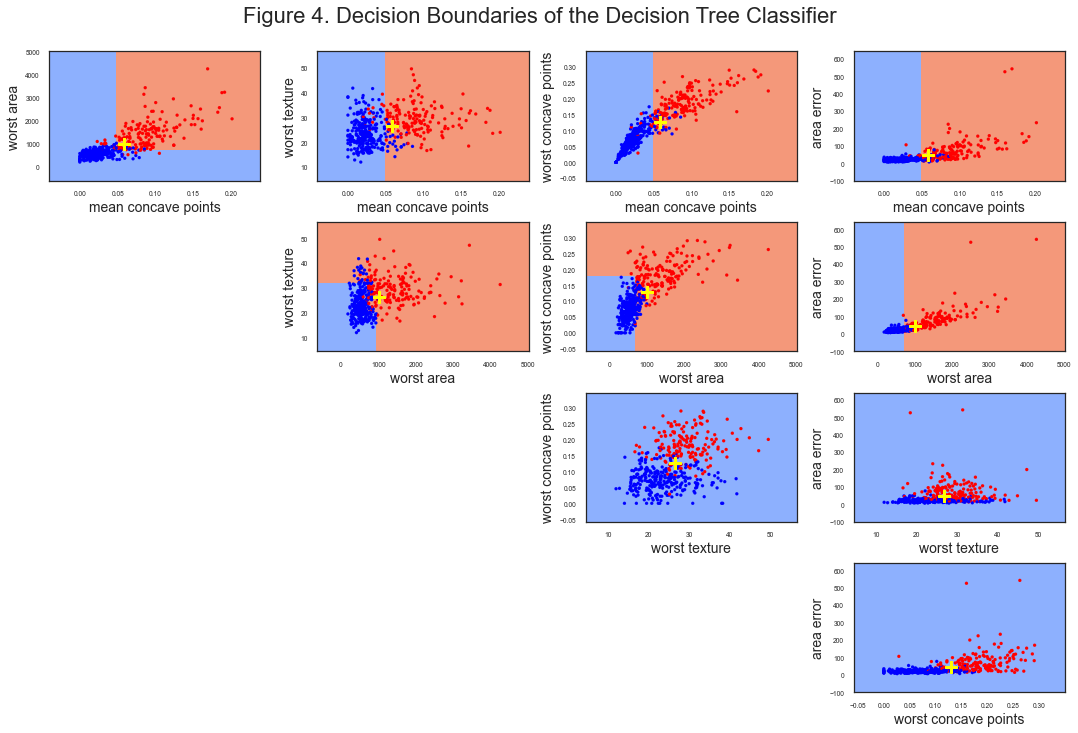

In [14]:
# list below is permutation and combination of different attributes. The third elements are the indexes for plotting the subplots
lst_scatter = [[0,1,1],[0,2,2],[0,3,3],[0,4,4],[1,2,6],[1,3,7],[1,4,8],[2,3,11],[2,4,12],[3,4,16]]   
fig = plt.figure(figsize=(15,10))
plt.suptitle('Figure 4. Decision Boundaries of the Decision Tree Classifier',fontsize=22,y=1.01)
for i,j,k in lst_scatter:
    step_1 = (scatter_df.iloc[1,i] - scatter_df.iloc[0,i])/100                    # step = (end-start)/100
    step_2 = (scatter_df.iloc[1,j] - scatter_df.iloc[0,j])/100
    xx,yy = np.meshgrid(np.arange(scatter_df.iloc[0,i],scatter_df.iloc[1,i],step_1),
                        np.arange(scatter_df.iloc[0,j],scatter_df.iloc[1,j],step_2))
    analysis_point_replace = analysis_point.copy()                                # copy the analysis_point to a new variable
    Z_list = []
    for a in yy[:,0]:
        for b in xx[0,:]:
            analysis_point_replace[top_5_index[j]] = a                            # replace the values in the analysis point
            analysis_point_replace[top_5_index[i]] = b
            Z = tree_clf_best.predict(analysis_point_replace.reshape(1,-1))       # predict each point in the grid
            Z_list.append(int(Z))                                                 # append elements to the list of Z
    Z_arr = np.array(Z_list).reshape(xx.shape)                                    # convert the list object to an array and reshape it
    ax = fig.add_subplot(4,4,k)  
    ax.contourf(xx,yy,Z_arr,cmap='coolwarm',levels=1)                             # plot and set the figure
    ax.scatter(X_train[scatter_df.columns[i]],X_train[scatter_df.columns[j]],c=y_train,s=10,cmap='bwr',linewidths=0.1)
    ax.plot(analysis_point[top_5_index[i]],analysis_point[top_5_index[j]],marker='$+$',color='#FFFF00',markersize=15)
    ax.set_xlabel(X_train.columns[top_5_index[i]],fontsize=14)
    ax.set_ylabel(X_train.columns[top_5_index[j]],fontsize=14)
plt.tight_layout()

### 3.3 Questions
1. **Are the classes well separated by the decision boundaries, and are the shapes of the decision boundaries well adapted to the data?**
2. **Why might some of the plots only show one predicted class and no decision boundaries within the plot?**  (Note that you should see some of these - if not, comment on why such a plot, as shown in the example image above, could exist.)

### 3.3 Answer:
1. Classes are relatively well separated by the decision boundaries in some of the figures, but in the other figures, the decision boundaries do not separate the classes well. The shapes of the decision boundaries are not adapted to the data since it is a decision tree classifier and the boundaries are horizontal and vertical.  
2. Some of the plots only have a blue background and have no decision boundaries within the plot. It is because value changes to these two attributes did not affect the prediction result. There are also many horizontal and vertical boundaries in the other figures that show that some changes to the analysis point do not affect the prediction result. The plots that have no decision boundaries just happened to have two attributes of this kind in one figure.
***

## 4 Train a support vector classifier with RBF kernel (10%)

### 4.1 Create a support vector classifier (SVC) object
Use a radial basis function kernel. Below, you will perform a hyper parameter search of C. Read about the remaining parameters of the classifier in the documentation and decide whether the default value is a good choice in this application. 

**Question: Are there any parameters where using a setting that is different from the default setting would be better for this application?**

The documentation can be found here: 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

In [15]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='rbf',class_weight='balanced',gamma=0.1)

### 4.1 Answer：
Yes, again we have 'class_weight' to balance the weight of the two classes. According to the SVC documentation, it will set the parameter C of class i to class_weight[i]*C. For this application, it can give the malignant class a higher weight. Higher C means less margin violations, so by setting 'class_weight', we can make a more accurate prediction for malignant cases. Another useful parameter for the RBF kernel is 'gamma'. It can be used to control overfitting or underfitting of the model. I'll just set gamma as 0.1 for this application to avoid overfitting.
***

### 4.2 Build a pipeline
This should include any pre-processing steps that you think are necessary. 

**Question: Is scaling of the data necessary for using a support vector classifier?**

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
svc_clf_pipeline = Pipeline([('scaler',StandardScaler())])                # include StandardScaler in the pipeline
X_train_svc = svc_clf_pipeline.fit_transform(X_train,y_train)             # fit and transform the training set
X_test_1_svc = svc_clf_pipeline.transform(X_test_1)                       # transform the two test datasets
X_test_2_svc = svc_clf_pipeline.transform(X_test_2)
analysis_point_svc = svc_clf_pipeline.transform(analysis_point.reshape(1,-1)).ravel()      # transform the analysis point

X_train_svc = pd.DataFrame(X_train_svc,columns=X.columns)                 # convert them to Dataframe objects
X_test_1_svc = pd.DataFrame(X_test_1_svc,columns=X.columns)
X_test_2_svc = pd.DataFrame(X_test_2_svc,columns=X.columns)

### 4.2 Answer:
Yes, scaling of the data is necessary for using a support vector classifier. SVC is sensitive to the scales. If the scale of one feature is much larger than the other features, the distance of two instances will be so close in horizontal or vertical direction, so the decision boundary will also be close to horizontal or vertical. From the point of view of accuracy, attributes that have larger scales may have bigger influence on the decision boundary, because a slight change to these attributes can be a large change relative to the other attributes. These attributes will dominate the boundary and the prediction result as well.
***

### 4.3 Perform a grid search
Use a five-fold cross validation over values of the regularisation parameter C. Choose the value range yourself. 

**Questions:**
1. **What is the best value for C?**
2. **How did you decide on the range of values to specify?**

In [17]:
from sklearn.model_selection import GridSearchCV
svc_grid = {'C':[0.001,0.01,0.1,1,10,100,1000]}
# create a GridSearchCV object
grid_search_svc = GridSearchCV(svc_clf,svc_grid,cv=5,scoring='recall',return_train_score=True,refit='recall')
grid_search_svc.fit(X_train_svc,y_train)                                       # fit the training set to find the best C value       
print('Best parameters for SVC is:',grid_search_svc.best_params_)
print('Best recall score for SVC is:',grid_search_svc.best_score_)

svc_clf_best = grid_search_svc.best_estimator_                                 # svc_clf_best is a SVC object with the best parameters

Best parameters for SVC is: {'C': 1}
Best recall score for SVC is: 0.9823529411764707


### 4.3 Answer:
1. The best value for C depends on the random state and the other parameters in the classifier. For the current random state and setting, the best value for C is shown above.  
2. I decided on the range of values based on the textbook, the examples given by the GridSearchCV documentation, and the practical significance of the C-value. C is the coefficient of the slack variable $\sum_{i=1}^{m}{\zeta^{(i)}}$ and it cannot be negative. It is able to control the margin violation of the model by setting the hyperparameter C. The higher the C value, the more 'stringent' the model. Textbook suggests that if it is hard to decide what values to try out, consecutive powers of 10 would be a good choice to start, and that is exactly what the examples given by chapter 5 and GridSearchCV documentation do in grid search. It would be meaningless if the step or the range of C is too small, so I decided to try consecutive powers of 10 from 0.001 to 1000 in grid search.
***

## 5 Evaluate the support vector classifier (15%)

### 5.1 Performance
Calculate the confusion matrix, precision and recall of the final classifier using appropriate data and making sure that a 'positive' result corresponds to cancer (i.e., malignant cells). 

**Question: Based on these metrics, what is the chance of failing to detect a sample with cancer?**

In [18]:
svc_pred = svc_clf_best.predict(X_test_1_svc)                                   # predict
svc_confusion = confusion_matrix(y_test_1,svc_pred)                             # calculate the confusion_matrix of the SVC on test set 1
svc_precision = precision_score(y_test_1,svc_pred)                              # calculate the precision of the SVC on test set 1
svc_recall = recall_score(y_test_1,svc_pred)                                    # calculate the recall of the SVC on test set 1
print('The confusion matrix is:\n',svc_confusion,'\n')
print('Precision is:',svc_precision,'\n')
print('Recall is:',svc_recall,'\n')

The confusion matrix is:
 [[35  1]
 [ 2 19]] 

Precision is: 0.95 

Recall is: 0.9047619047619048 



### 5.1 Answer:
The structure of confusion matrix is:

||N|P|
|---|---|---|
|N|TN|FP|
|P|FN|TP|

Based on these metrics, the chance of failing to detect a sample with cancer is FN (positive but classified as negative) divided by the actual number of positive cases (i.e. FN+TP). Recall=TP/(FN+TP), so FN/(FN+TP)=1-Recall. For the current recall (0.90), the chance of failing to detect a sample with cancer is 1-0.90=0.10
***

### 5.2 Decision boundaries
Repeat what you did in section 3.3, but now for the results from the support vector classifier, reusing code when you can. Use the same five features as you used in section 3.3. Include the decision boundary, scatterplot of the data and the Analysis Point. ***In addition, mark the support vectors clearly.***

In [19]:
# create a DataFrame for plotting
scatter_df_svc = pd.DataFrame()         
for i in top_5_index:
    col_name = X_train_svc.columns[i]                            # return the column name of the attribute whose index is in top_5_index
    col_min = X_train_svc[col_name].min()                        # return the minimum value of the attribute
    col_max = X_train_svc[col_name].max()                        # return the maximum value of the attribute
    col_20 = (col_max-col_min)*0.2                               # (max-min)*20%
    col_start = col_min - col_20                                 # the start point of the attribute
    col_end = col_max + col_20                                   # the end point of the attribute
    start_end_arr = np.array([col_start,col_end])
    scatter_df_svc[col_name] = start_end_arr                     # add columns to the DataFrame
scatter_df_svc

,mean concave points,worst area,worst texture,worst concave points,area error
0,-2.278269,-2.591698,-3.428079,-2.610022,-2.923037
1,4.927893,7.227052,5.078167,3.527454,12.659177


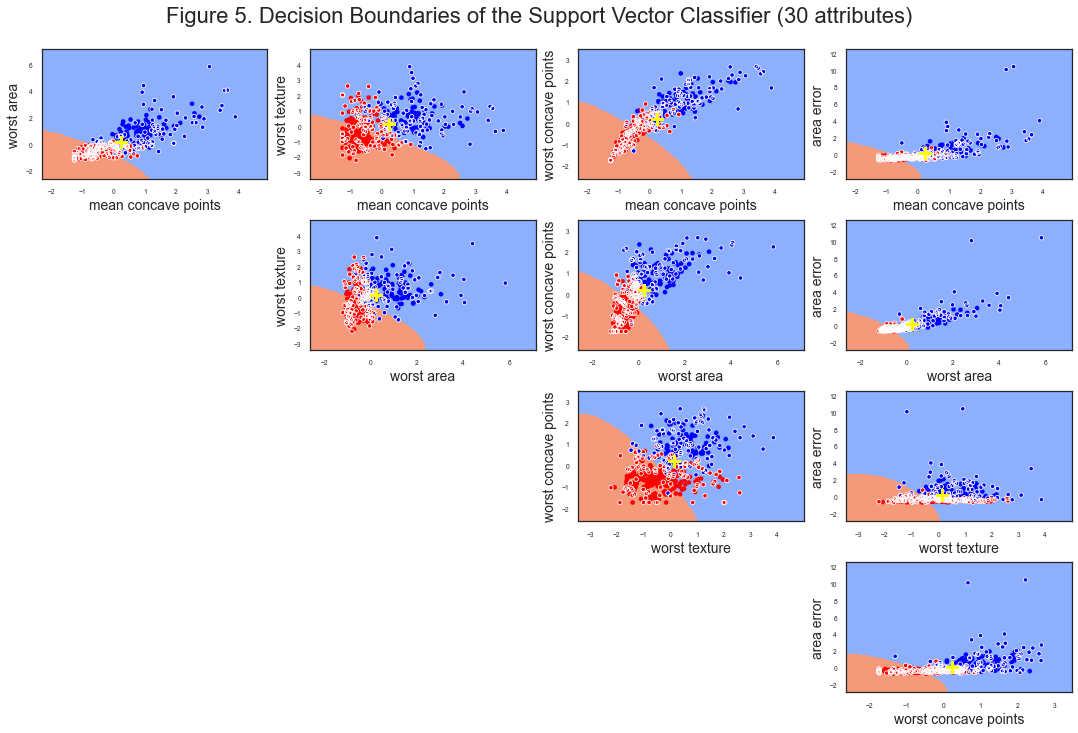

In [20]:
# list below is permutation and combination of different attributes. The third elements are the indexes for plotting the subplots
lst_scatter = [[0,1,1],[0,2,2],[0,3,3],[0,4,4],[1,2,6],[1,3,7],[1,4,8],[2,3,11],[2,4,12],[3,4,16]]
fig = plt.figure(figsize=(15,10))
fig.suptitle('Figure 5. Decision Boundaries of the Support Vector Classifier (30 attributes)',fontsize=22,y=1.01)
for i,j,k in lst_scatter:
    step_1 = (scatter_df_svc.iloc[1,i] - scatter_df_svc.iloc[0,i])/100          # step = (start-end)/100
    step_2 = (scatter_df_svc.iloc[1,j] - scatter_df_svc.iloc[0,j])/100
    xx,yy = np.meshgrid(np.arange(scatter_df_svc.iloc[0,i],scatter_df_svc.iloc[1,i],step_1),
                        np.arange(scatter_df_svc.iloc[0,j],scatter_df_svc.iloc[1,j],step_2))
    analysis_point_svc_replace = analysis_point_svc.copy()                      # copy the analysis_point to a new variable
    Z_list = []
    for a in yy[:,0]:
        for b in xx[0,:]:
            analysis_point_svc_replace[top_5_index[j]] = a                      # replace the values in the analysis point
            analysis_point_svc_replace[top_5_index[i]] = b
            Z = svc_clf_best.predict(analysis_point_svc_replace.reshape(1,-1))  # Z is the prediction result of each coordinate point
            Z_list.append(int(Z))                                               # append elements to the list of Z
    Z_arr = np.array(Z_list).reshape(xx.shape)                                  # convert list_Z to an array and reshape the array
    ax = fig.add_subplot(4,4,k)                                                 # plot and set the figure
    ax.contourf(xx,yy,Z_arr,cmap='coolwarm_r',levels=1)
    ax.scatter(X_train_svc[scatter_df_svc.columns[i]],X_train_svc[scatter_df_svc.columns[j]],
               c=y_train,s=20,cmap='bwr_r',linewidths=0.1)
    ax.scatter(svc_clf_best.support_vectors_[:,top_5_index[i]], svc_clf_best.support_vectors_[:,top_5_index[j]],
               s=20,facecolor='None',edgecolor='w',linewidths=0.8)              # plot the support vectors
    ax.plot(analysis_point_svc[top_5_index[i]],analysis_point_svc[top_5_index[j]],marker='$+$',color='#FFFF00',markersize=15)    
    ax.set_xlabel(X_train_svc.columns[top_5_index[i]],fontsize=14)
    ax.set_ylabel(X_train_svc.columns[top_5_index[j]],fontsize=14)
plt.tight_layout()

The support vectors in figure 5 seem to be scattered randomly in the plots. I assume that it is because when I use 30 attributes to make the prediction, The other attributes also contribute to the decision boundaries. It is hard to tell the relationship between the support vectors and the decision boundaries from figure 5, so I plotted the figure 6 which takes 2 attributes each time and makes predictions separately.
***

Best parameters for SVC is: {'C': 100}
Best recall score for SVC is: 0.9588235294117646
Best parameters for SVC is: {'C': 1}
Best recall score for SVC is: 0.9411764705882352
Best parameters for SVC is: {'C': 0.1}
Best recall score for SVC is: 0.9117647058823529
Best parameters for SVC is: {'C': 10}
Best recall score for SVC is: 0.9294117647058824
Best parameters for SVC is: {'C': 10}
Best recall score for SVC is: 0.9235294117647058
Best parameters for SVC is: {'C': 10}
Best recall score for SVC is: 0.9470588235294117
Best parameters for SVC is: {'C': 10}
Best recall score for SVC is: 0.8588235294117647
Best parameters for SVC is: {'C': 1}
Best recall score for SVC is: 0.9058823529411765
Best parameters for SVC is: {'C': 1}
Best recall score for SVC is: 0.8
Best parameters for SVC is: {'C': 10}
Best recall score for SVC is: 0.9411764705882353


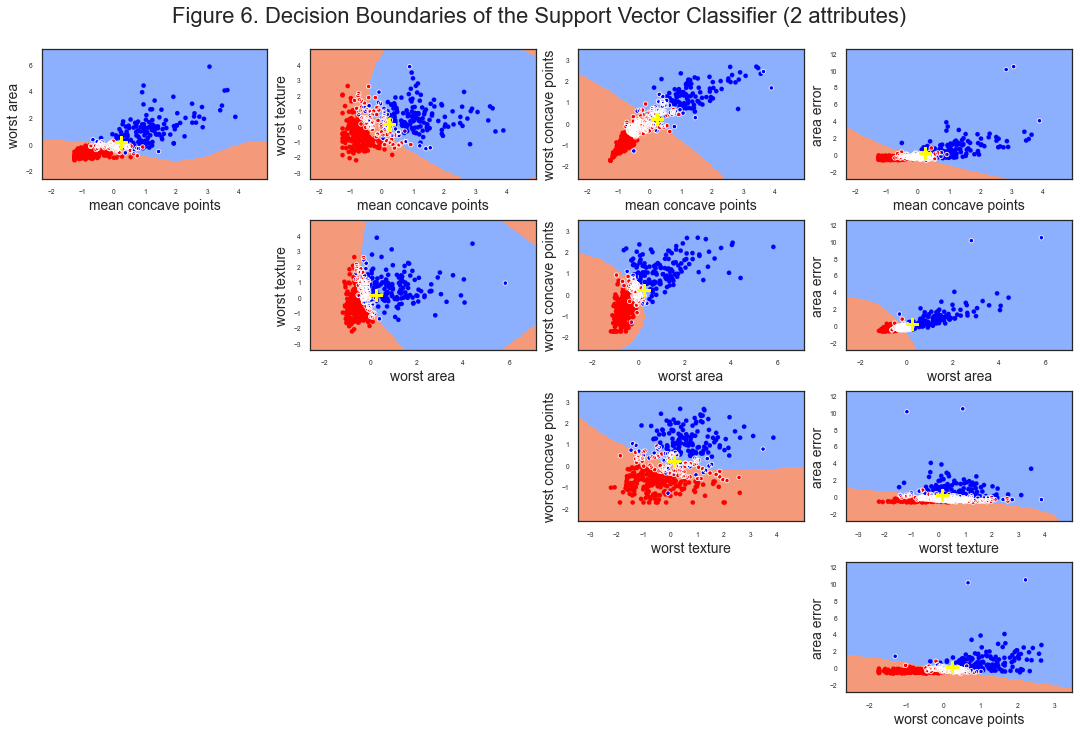

In [21]:
# list below is permutation and combination of different attributes. The third elements are the indexes for plotting the subplots
lst_scatter = [[0,1,1],[0,2,2],[0,3,3],[0,4,4],[1,2,6],[1,3,7],[1,4,8],[2,3,11],[2,4,12],[3,4,16]]
fig = plt.figure(figsize=(15,10))
fig.suptitle('Figure 6. Decision Boundaries of the Support Vector Classifier (2 attributes)',fontsize=22,y=1.01)
for i,j,k in lst_scatter:
    step_1 = (scatter_df_svc.iloc[1,i] - scatter_df_svc.iloc[0,i])/100       # step = (start-end)/100
    step_2 = (scatter_df_svc.iloc[1,j] - scatter_df_svc.iloc[0,j])/100
    xx,yy = np.meshgrid(np.arange(scatter_df_svc.iloc[0,i],scatter_df_svc.iloc[1,i],step_1),
                        np.arange(scatter_df_svc.iloc[0,j],scatter_df_svc.iloc[1,j],step_2))    
    svc_grid = {'C':[0.01,0.1,1,10,100,1000]}
    # run grid search for each combination of the attributes
    grid_search = GridSearchCV(svc_clf,svc_grid,cv=5,scoring='recall',return_train_score=True,refit='recall')
    grid_search.fit(X_train_svc.iloc[:,[top_5_index[i],top_5_index[j]]],y_train)
    print('Best parameters for SVC is:',grid_search.best_params_)
    print('Best recall score for SVC is:',grid_search.best_score_)
    svc_clf_best_2 = grid_search.best_estimator_                                # svc_clf_best_2 is a SVC object with the best parameters  
    Z = svc_clf_best_2.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)  # calculate Z for each coordinate point
    ax = fig.add_subplot(4,4,k)                                                 # plot and set the figure
    ax.contourf(xx,yy,Z,cmap='coolwarm_r',levels=1)
    ax.set_xlabel(X_train_svc.columns[top_5_index[i]],fontsize=14)
    ax.set_ylabel(X_train_svc.columns[top_5_index[j]],fontsize=14)
    ax.scatter(X_train_svc[scatter_df_svc.columns[i]],X_train_svc[scatter_df_svc.columns[j]],
               c=y_train,s=20,cmap='bwr_r',linewidths=0.1)        
    ax.scatter(svc_clf_best_2.support_vectors_[:,0], svc_clf_best_2.support_vectors_[:,1],
               s=20,facecolor='None',edgecolor='w',linewidths=0.8)              # plot the support vectors
    ax.plot(analysis_point_svc[top_5_index[i]],analysis_point_svc[top_5_index[j]],marker='$+$',color='#FFFF00',markersize=15)
plt.tight_layout()

### 5.3 Questions
1. **What is the meaning of the support vectors?**
2. **Where can we see their purpose in the diagrams?**
3. **What are the strengths or weaknesses of this classifier compared to the decision tree?**

### 5.3 Answer:
1. Support vectors are the vectors (instances) that decide the margin and decision boundaries of the support vector machine model. They are located on the edge of the street, and the street is 'supported' by them. 
2. We can see their purpose around the edge of the decision boundaries. 
3. Compared to the decision tree classifier, the strengths of SVC is that SVC is more flexible. It makes predictions by calculating the decision function $w^{T}x+b$ instead of simply comparing the value of the samples, and the boundaries do separate the two classes better than a decision tree model. However, SVC also has some weaknesses. SVC model is not as intuitive as decision trees, so it is difficult to trace back how the decision was made and fine tune the model. Meanwhile, the computational complexity of SVC is between $O(m^{2}\times n)$ to $O(m^{3}\times n)$ (m stands for the number of instances and n for features). It means that if the number of instances is too large, using SVC will be extremely slow.
***

## 6 Compare the classifiers and interpret (10%)

In [22]:
# the decision tree model
tree_pred = tree_clf_best.predict(X_test_2)                 # predict
tree_confusion = confusion_matrix(y_test_2,tree_pred)       # calculate the confusion matrix of the decision tree classifier on test set 2
tree_accuracy = accuracy_score(y_test_2,tree_pred)          # calculate the accuracy of the decision tree classifier on test set 2
tree_precision = precision_score(y_test_2,tree_pred)        # calculate the precision of the decision tree classifier on test set 2
tree_recall = recall_score(y_test_2,tree_pred)              # calculate the recall of the decision tree classifier on test set 2
tree_F1 = f1_score(y_test_2,tree_pred)                      # calculate the F1 of the decision tree classifier on test set 2
print('The confusion matrix of the decision tree classifier is:\n',tree_confusion,'\n')
print('Accuracy score of the decision tree classifier is:\n',tree_accuracy,'\n')
print('Precision score of the decision tree classifier is:\n',tree_precision,'\n')
print('Recall score of the decision tree classifier is:\n',tree_recall,'\n')
print('F1 score of the decision tree classifier is:\n',tree_F1,'\n')

The confusion matrix of the decision tree classifier is:
 [[36  0]
 [ 3 18]] 

Accuracy score of the decision tree classifier is:
 0.9473684210526315 

Precision score of the decision tree classifier is:
 1.0 

Recall score of the decision tree classifier is:
 0.8571428571428571 

F1 score of the decision tree classifier is:
 0.923076923076923 



In [23]:
# the support vector classifier
svc_pred = svc_clf_best.predict(X_test_2_svc)               # predict
svc_confusion = confusion_matrix(y_test_2,svc_pred)         # calculate the confusion matrix of the SVC on test set 2
svc_accuracy = accuracy_score(y_test_2,svc_pred)            # calculate the accuracy of the SVC on test set 2
svc_precision = precision_score(y_test_2,svc_pred)          # calculate the precision of the SVC on test set 2
svc_recall = recall_score(y_test_2,svc_pred)                # calculate the recall of the SVC on test set 2
svc_F1 = f1_score(y_test_2,svc_pred)                        # calculate the F1 of the SVC on test set 2
print('The confusion matrix of the support vector classifier is:\n',svc_confusion,'\n')
print('Accuracy score of the support vector classifier is:\n',svc_accuracy,'\n')
print('Precision score of the support vector classifier is:\n',svc_precision,'\n')
print('Recall score of the support vector classifier is:\n',svc_recall,'\n')
print('F1 score of the support vector classifier is:\n',svc_F1,'\n')

The confusion matrix of the support vector classifier is:
 [[36  0]
 [ 0 21]] 

Accuracy score of the support vector classifier is:
 1.0 

Precision score of the support vector classifier is:
 1.0 

Recall score of the support vector classifier is:
 1.0 

F1 score of the support vector classifier is:
 1.0 



### 6.1 Question
**How well do the classifiers extrapolate outside of the central region near the Analysis Point?**

### 6.1 Answer:
Decision tree classifier does not extrapolate outside of the central region near the analysis point well. Instances in the subplots of figure 4. 'Decision Boundaries of the Decision Tree Classifier' are not linear separable but they are separated only by horizontal and vertical lines, so many instances are on the wrong side of the boundaries. SVC extrapolate better than the decision tree classifier. The boundaries in figure 6. 'Decision Boundaries of the Support Vector Classifier (2 attributes)' separate the instances well near the analysis point.
***

### 6.2 Question
**Which classifier do you think performs better and what are the reasons for your choice? Report the performance value of the best classifier.**

### 6.2 Answer:
SVC seems to perform better than the decision tree classifier for this task. Firstly, the highest recall score of SVC is higher than the decision tree classifier, which indicates that SVC has a better performance than decision tree classifier in detecting malignant cases. Secondly, confusion matrix, precision and recall suggest that SVC performs better than the decision tree classifier on the final test set. The performance values of the SVC on the final test set are very satisfactory. FN and FP are both zero and the accuracy, precision, recall and F1 scores are 1.0.
***

### 6.3 Questions
1. **Do you see sources of bias in the two classifiers?**
2. **Are either of the classifiers showing any signs of overfitting or underfitting?  Give reasons for your answers.**

### 6.3 Answer:
1. Yes, figure 2. 'Histograms' shows that benign cases and malignant cases are not perfectly separated, the overlapping part is the source of bias. Decision tree made the decision by comparing the values with a threshold, if the threshold of an attribute cannot distinguish malignant from benign, it will lead to bias. For the support vector classifier, the results of $w^{T}x+b$ could be wrong for the instances in the overlapping parts, this is the source of bias for SVC.
2. Yes, SVC is prone to overfitting, and decision tree classifiers sometimes are also overfitting. If the parameter C and gamma are set incorrectly (especially if gamma is too large), the decision boundaries in figure 6 will be perfectly adapted to the data, this is the sign of overfitting of the SVC. And if we do not control the max_depth and min_samples_split, the depth of the tree could be really deep, that is the sign of overfitting of the decision tree classifier.
***

## Assessment
Hand in your notebook as an .ipynb file via the MyUni page. Make sure your notebook includes your code and formatted (Markdown) text blocks explaining what you have done. Your mark will be based on both code correctness and the quality of your comments and analysis. 

The assignment is worth 35% of your overall mark for the course.

Mark Jenkinson and Stephan Lau  
March 2021

***
CHEN Chen a1819099, 9-May-2021